Notebook containing initial analyses and data handling pipelines. We will grade the correctness, quality of code, and quality of textual descriptions.

In [1]:
import numpy as np
import pandas as pd
import itertools
from collections import Counter
import json
import matplotlib.pyplot as plt
from imdb import Cinemagoer
%matplotlib inline

DATA_PATH = 'Data/'
PLOT_SUMMARIES_FILENAME = 'plot_summaries.txt'
MOVIE_METADATA_FILENAME = 'movie.metadata.tsv'
CHARACTER_METADATA_FILENAME = 'character.metadata.tsv'
CHARACTER_TYPES_FILENAME = 'tvtropes.clusters.txt' #character types 
CHARACTER_NAMES_FILENAME ='name.clusters.txt' #unique character names used in at least 2 movies

# About the movie metadata

In [2]:
col_names_movie_metadata = ['Wikipedia movie ID', 'Freebase movie ID', 'Movie name', 'Movie release date', 
                            'Movie box office revenue', 'Movie runtime', 'Movie languages (Freebase ID:name tuples)', 
                            'Movie countries (Freebase ID:name tuples)', 'Movie genres (Freebase ID:name tuples)']
df_movie_metadata = pd.read_csv(DATA_PATH + MOVIE_METADATA_FILENAME, sep='\t', header=None, names=col_names_movie_metadata, index_col=0)
df_movie_metadata.head()

,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages (Freebase ID:name tuples),Movie countries (Freebase ID:name tuples),Movie genres (Freebase ID:name tuples)
Wikipedia movie ID,,,,,,,,
975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


In [3]:
print("Max runtime:")
print(df_movie_metadata[df_movie_metadata["Movie runtime"] == df_movie_metadata["Movie runtime"].max()][["Movie name", "Movie release date", "Movie runtime"]])
df_movie_metadata.describe()

Max runtime:
                        Movie name Movie release date  Movie runtime
Wikipedia movie ID                                                  
10815585            Zero Tolerance               1995      1079281.0


,Movie box office revenue,Movie runtime
count,8.401000e+03,6.129100e+04
mean,4.799363e+07,1.118192e+02
std,1.121753e+08,4.360070e+03
min,1.000000e+04,0.000000e+00
25%,2.083193e+06,8.100000e+01
50%,1.063969e+07,9.300000e+01
75%,4.071696e+07,1.060000e+02
max,2.782275e+09,1.079281e+06


In [4]:
print(f"Total size of dataset: {df_movie_metadata.shape[0]}")
print("Null data:")
print(df_movie_metadata.isnull().sum())

Total size of dataset: 81741
Null data:
Freebase movie ID                                0
Movie name                                       0
Movie release date                            6902
Movie box office revenue                     73340
Movie runtime                                20450
Movie languages (Freebase ID:name tuples)        0
Movie countries (Freebase ID:name tuples)        0
Movie genres (Freebase ID:name tuples)           0
dtype: int64


 We can see that most of the dataset has missing box office data.<br>
 We can also see that a significant part of the dataset has missing runtime data. We also cannot consider the data to be perfectly correct (The movie Zero Tolerance is actually only 94 minutes long)<br>
 The missing release dates are on a very small subset of the dataset. We will simply ignore those lines when using release dates.
 
 We will be completing the dataset with imdb-data using the Cinemagoer python library

In [5]:
print(f"Movies without country: {(df_movie_metadata['Movie countries (Freebase ID:name tuples)']=='{}').sum()}")
country_counts = dict(Counter(itertools.chain.from_iterable(map(lambda x: json.loads(x).values(), df_movie_metadata["Movie countries (Freebase ID:name tuples)"].values.tolist()))))
country_counts = dict(sorted(country_counts.items(), key = lambda x: x[1], reverse = True))
#plt.bar(country_counts.keys(), country_counts.values()) #completely unreadable
print("Country occurence count:")
country_counts


Movies without country: 8154
Country occurence count:


{'United States of America': 34408,
 'India': 8411,
 'United Kingdom': 7868,
 'France': 4395,
 'Italy': 3163,
 'Japan': 2647,
 'Canada': 2534,
 'Germany': 2393,
 'Argentina': 1468,
 'Hong Kong': 1240,
 'Spain': 1136,
 'Australia': 1114,
 'South Korea': 887,
 'Mexico': 870,
 'Netherlands': 840,
 'Sweden': 657,
 'West Germany': 647,
 'China': 645,
 'Denmark': 610,
 'Soviet Union': 564,
 'Philippines': 389,
 'Poland': 382,
 'Czechoslovakia': 376,
 'Belgium': 360,
 'New Zealand': 355,
 'Norway': 345,
 'Russia': 345,
 'Hungary': 325,
 'German Democratic Republic': 322,
 'Yugoslavia': 306,
 'Brazil': 298,
 'Ireland': 287,
 'Switzerland': 280,
 'Austria': 267,
 'Finland': 247,
 'Czech Republic': 240,
 'Israel': 235,
 'Turkey': 215,
 'England': 211,
 'Iran': 209,
 'Thailand': 208,
 'South Africa': 200,
 'Greece': 192,
 'Pakistan': 189,
 'Taiwan': 176,
 'Portugal': 167,
 'Croatia': 155,
 'Egypt': 153,
 'Romania': 139,
 'Indonesia': 124,
 'Malaysia': 106,
 'Bulgaria': 105,
 'Sri Lanka': 95,
 'Si

Seeing the country occurence count, we can consider that the dataset is oriented towards films that have a minimum popularity in the american culture

In [6]:
print(f"Movies without language: {(df_movie_metadata['Movie languages (Freebase ID:name tuples)']=='{}').sum()}")
language_counts = dict(Counter(itertools.chain.from_iterable(map(lambda x: json.loads(x).values(), df_movie_metadata["Movie languages (Freebase ID:name tuples)"].values.tolist()))))
language_counts = dict(sorted(language_counts.items(), key = lambda x: x[1], reverse = True))
#plt.bar(language_counts.keys(), language_counts.values()) #completely unreadable
print("Language occurence count:")
language_counts


Movies without language: 13866
Language occurence count:


{'English Language': 40891,
 'Hindi Language': 3744,
 'Spanish Language': 3673,
 'French Language': 3422,
 'Silent film': 3183,
 'Italian Language': 2531,
 'Japanese Language': 2295,
 'German Language': 2258,
 'Tamil Language': 1896,
 'Malayalam Language': 1448,
 'Standard Mandarin': 1213,
 'Telugu language': 1197,
 'Russian Language': 1024,
 'Cantonese': 876,
 'Korean Language': 779,
 'Dutch Language': 597,
 'Swedish Language': 509,
 'Arabic Language': 499,
 'Standard Cantonese': 481,
 'Czech Language': 478,
 'Bengali Language': 457,
 'Danish Language': 442,
 'Portuguese Language': 398,
 'Polish Language': 370,
 'Urdu Language': 359,
 'Tagalog language': 351,
 'Kannada Language': 329,
 'Mandarin Chinese': 325,
 'Serbian language': 310,
 'Hebrew Language': 266,
 'Hungarian language': 241,
 'Thai Language': 219,
 'Persian Language': 209,
 'Norwegian Language': 208,
 'Turkish Language': 194,
 'Greek Language': 187,
 'Punjabi language': 177,
 'Filipino language': 177,
 'Finnish Language':

Seeing the language occurence count, we confirm what we said about the country counts

In [7]:
print(f"Movies without genre: {(df_movie_metadata['Movie genres (Freebase ID:name tuples)']=='{}').sum()}")
genre_counts = dict(Counter(itertools.chain.from_iterable(map(lambda x: json.loads(x).values(), df_movie_metadata["Movie genres (Freebase ID:name tuples)"].values.tolist()))))
genre_counts = dict(sorted(genre_counts.items(), key = lambda x: x[1], reverse = True))
#plt.bar(genre_counts.keys(), genre_counts.values()) #completely unreadable
print("Country occurence count:")
genre_counts

Movies without genre: 2294
Country occurence count:


{'Drama': 34007,
 'Comedy': 16349,
 'Romance Film': 10234,
 'Black-and-white': 9094,
 'Action': 8798,
 'Thriller': 8744,
 'Short Film': 8141,
 'World cinema': 7155,
 'Crime Fiction': 6948,
 'Indie': 6897,
 'Documentary': 5630,
 'Horror': 5280,
 'Silent film': 5250,
 'Adventure': 4963,
 'Family Film': 4598,
 'Action/Adventure': 4561,
 'Comedy film': 4362,
 'Musical': 4160,
 'Animation': 3534,
 'Romantic drama': 3372,
 'Mystery': 3195,
 'Science Fiction': 3052,
 'Fantasy': 2820,
 'Romantic comedy': 2680,
 'War film': 2652,
 'Japanese Movies': 2322,
 'Western': 2226,
 'Crime Thriller': 2122,
 'Period piece': 1758,
 'Comedy-drama': 1720,
 'Film adaptation': 1531,
 'Chinese Movies': 1525,
 'Biography': 1392,
 'Psychological thriller': 1331,
 'Bollywood': 1321,
 'Sports': 1206,
 'Biographical film': 1198,
 'LGBT': 1163,
 'Music': 1088,
 'Family Drama': 1043,
 'Black comedy': 1025,
 'Parody': 999,
 'Television movie': 972,
 'Martial Arts Film': 928,
 "Children's/Family": 926,
 'Teen': 925,
 '

newest: 2016-06-08, oldest: 1010-12-02
newest: 2013-06-28, oldest: 1894


<AxesSubplot:>

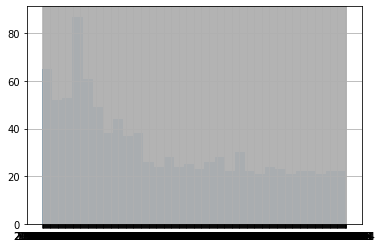

In [8]:
cleaned_dates = pd.to_datetime(df_movie_metadata['Movie release date'].dropna(), errors="ignore")
date_sample = cleaned_dates.sample(n = 1000)
print(f"newest: {cleaned_dates.max()}, oldest: {cleaned_dates.min()}")
print(f"newest: {date_sample.max()}, oldest: {date_sample.min()}")
date_sample.hist(bins = 30)

# About the character metadata

In [9]:
col_names_character_metadata = ['Wikipedia movie ID', 'Freebase movie ID', 'Movie release date', 'Character name', 'Actor date of birth', 'Actor gender', 'Actor height (in meters)', 'Actor ethnicity (Freebase ID)', 'Actor name', 'Actor age at movie release', 'Freebase character/actor map ID', 'Freebase character ID', 'Freebase actor ID']
df_character_metadata = pd.read_csv(DATA_PATH + CHARACTER_METADATA_FILENAME, sep='\t', header=None, names=col_names_character_metadata, index_col=0)
df_character_metadata.head()

,Freebase movie ID,Movie release date,Character name,Actor date of birth,Actor gender,Actor height (in meters),Actor ethnicity (Freebase ID),Actor name,Actor age at movie release,Freebase character/actor map ID,Freebase character ID,Freebase actor ID
Wikipedia movie ID,,,,,,,,,,,,
975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg


In [10]:
df_character_metadata.describe()

,Actor height (in meters),Actor age at movie release
count,154824.000000,292556.000000
mean,1.788893,37.788523
std,4.379940,20.587870
min,0.610000,-7896.000000
25%,1.676400,28.000000
50%,1.750000,36.000000
75%,1.830000,47.000000
max,510.000000,103.000000


In [11]:
print(f"Total size of dataset: {df_character_metadata.shape[0]}")
print("Null data:")
print(df_character_metadata.isnull().sum())

Total size of dataset: 450669
Null data:
Freebase movie ID                       0
Movie release date                   9995
Character name                     257875
Actor date of birth                106145
Actor gender                        45609
Actor height (in meters)           295845
Actor ethnicity (Freebase ID)      344611
Actor name                           1228
Actor age at movie release         158113
Freebase character/actor map ID         0
Freebase character ID              257865
Freebase actor ID                     815
dtype: int64


In [12]:
print(df_character_metadata["Actor gender"].dropna().value_counts())
print(df_character_metadata[["Actor gender", "Freebase actor ID"]].drop_duplicates().dropna()["Actor gender"].value_counts())

M    270257
F    134803
Name: Actor gender, dtype: int64
M    61519
F    35864
Name: Actor gender, dtype: int64


In [13]:
print(df_character_metadata["Actor ethnicity (Freebase ID)"].dropna().value_counts())
print(df_character_metadata[["Actor ethnicity (Freebase ID)", "Freebase actor ID"]].drop_duplicates().dropna()["Actor ethnicity (Freebase ID)"].value_counts())

/m/0dryh9k    16351
/m/0x67       10159
/m/041rx      10121
/m/02w7gg      6165
/m/033tf_      3857
              ...  
/m/043_z22        1
/m/03x_fq7        1
/m/01hphz         1
/m/033fjj         1
/m/013y54         1
Name: Actor ethnicity (Freebase ID), Length: 479, dtype: int64
/m/0x67       1472
/m/0dryh9k     721
/m/041rx       717
/m/02ctzb      494
/m/02w7gg      385
              ... 
/m/0960kn        1
/m/0h6mqq9       1
/m/0dqrh8        1
/m/07n8wy        1
/m/013y54        1
Name: Actor ethnicity (Freebase ID), Length: 479, dtype: int64


# About the plot summaries

In [14]:
col_names_plot_summaries = ['Wikipedia movie ID', 'Plot summary']
df_plot_summaries = pd.read_csv(DATA_PATH + PLOT_SUMMARIES_FILENAME, sep='\t', header=None, names=col_names_plot_summaries, index_col=0)
df_plot_summaries.head()

,Plot summary
Wikipedia movie ID,
23890098,"Shlykov, a hard-working taxi driver and Lyosha..."
31186339,The nation of Panem consists of a wealthy Capi...
20663735,Poovalli Induchoodan is sentenced for six yea...
2231378,"The Lemon Drop Kid , a New York City swindler,..."
595909,Seventh-day Adventist Church pastor Michael Ch...


In [15]:
print(f"Total size of dataset: {df_plot_summaries.shape[0]}")
print("Null data:")
print(df_plot_summaries.isnull().sum())

Total size of dataset: 42303
Null data:
Plot summary    0
dtype: int64


In [16]:
print(f"movies metadata count: {df_movie_metadata.shape[0]}")
print(f"plot summaries count: {df_plot_summaries.shape[0]}")
print(f"intersection count: {df_movie_metadata.join(df_plot_summaries, how = 'inner').shape[0]}")


movies metadata count: 81741
plot summaries count: 42303
intersection count: 42204


# Completing and processing the dataset

We only keep movies with a summary.<br>
We only keep movies with at least one character.

In [17]:
df_movie_metadata = df_movie_metadata.join(df_plot_summaries, how= 'inner')
df_movie_metadata = df_movie_metadata[df_movie_metadata["Freebase movie ID"].isin(df_character_metadata["Freebase movie ID"])]
print(df_movie_metadata.shape)
df_movie_metadata.head()

(37779, 9)


,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages (Freebase ID:name tuples),Movie countries (Freebase ID:name tuples),Movie genres (Freebase ID:name tuples),Plot summary
Wikipedia movie ID,,,,,,,,,
975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...","Set in the second half of the 22nd century, th..."
9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...",A series of murders of rich young women throug...
261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}","Eva, an upper class housewife, becomes frustra..."
18998739,/m/04jcqvw,The Sorcerer's Apprentice,2002,NaN,86.0,"{""/m/02h40lc"": ""English Language""}","{""/m/0hzlz"": ""South Africa""}","{""/m/0hqxf"": ""Family Film"", ""/m/01hmnh"": ""Fant...","Every hundred years, the evil Morgana returns..."
6631279,/m/0gffwj,Little city,1997-04-04,NaN,93.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06cvj"": ""Romantic comedy"", ""/m/0hj3n0w"": ...","Adam, a San Francisco-based artist who works a..."


We then try to complete the dataset with values from imdb.

In [22]:

clean_movie_metadata = []
ia = Cinemagoer()
import random

for index, row in df_movie_metadata.iterrows():
    while True:
        try:
            film = ia.search_movie(row['Movie name'])[0]
            break
        except IndexError:
            pass
        except:
            print(row['Movie name'], "not found")
    if row.isnull().sum() == 0:
        clean_movie_metadata.append([film.movieID, *row.tolist()[1:]])
        print([film.movieID, *row.tolist()[1:3]])
    else:
        try:
            if film["title"].casefold() == row['Movie name'].casefold() and film["year"] == pd.to_datetime(row['Movie release date']).year:
                film = ia.get_movie(film.movieID)
                clean_movie_metadata.append([film.movieID, film["title"], film["year"], int(film["box office"]['Opening Weekend United States'].split()[0][1:].replace(',','')), int(film["runtimes"][0]), row["Movie languages (Freebase ID:name tuples)"], row["Movie countries (Freebase ID:name tuples)"], row["Movie genres (Freebase ID:name tuples)"], row["Plot summary"]])
                print([film.movieID, film["title"], film["year"]])
            else:
                print([film.movieID, film["title"], film["year"]], "mismatch", [row['Movie name'], pd.to_datetime(row['Movie release date']).year])
        except KeyError as e:
            print(film["title"], "missing data", e)
    if random.random() < 0.1:
        break
        
clean_movie_metadata = pd.DataFrame(clean_movie_metadata, columns = ["imdbid", "Movie name", "Movie release year", "Movie box office revenue", "Movie runtime", "Movie languages", "Movie countries", "Movie genres", "Plot summary"])
clean_movie_metadata.set_index("imdbid")
clean_movie_metadata

['0228333', 'Ghosts of Mars', '2001-08-24']
White of the Eye missing data 'box office'
A Woman in Flames missing data 'box office'
['0963966', "The Sorcerer's Apprentice", 2010] mismatch ["The Sorcerer's Apprentice", 2002]
Little City missing data 'box office'
['0097499', 'Henry V', '1989-11-08']
Aaahh Belinda missing data 'year'
['0033888', 'The Mechanical Monsters', 1941] mismatch ['The Mechanical Monsters', nan]
['0058331', 'Mary Poppins', '1964-08-27']
Die Fahne von Kriwoj Rog missing data 'box office'
['0892904', 'White on Rice', 2009]
Anbu Thozhi missing data 'box office'
['0255819', 'Baby Boy', '2001-06-27']
Bindiya Chamkegi missing data 'box office'
Vandanam missing data 'box office'
['4901338', 'Sakalakala Vallavan', 2015] mismatch ['Anokha Rishta', 1986]
['1849787', 'Karayilekku Oru Kadal Dooram', 2011] mismatch ['Karayilekku Oru Kadal Dooram', 2010]
Siam Sunset missing data 'box office'
['14786996', 'Shrirasthu Shubhamasthu', 2000] mismatch ['Kausthubham', 2010]
Troops missi

,imdbid,Movie name,Movie release year,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres,Plot summary
0,0228333,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...","Set in the second half of the 22nd century, th..."
1,0097499,Henry V,1989-11-08,10161099.0,137.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/04xvh5"": ""Costume drama"", ""/m/082gq"": ""Wa...",{{Plot|dateAct 1Act 2Act 3Act 4Act 5 Finally n...
2,0058331,Mary Poppins,1964-08-27,102272727.0,139.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/0hj3myq"": ""Children's/Family"", ""/m/04t36""...",The film opens with Mary Poppins perched in a...
3,0892904,White on Rice,2009,8079.0,83.0,{},"{""/m/09c7w0"": ""United States of America""}","{""/m/06cvj"": ""Romantic comedy"", ""/m/02l7c8"": ""...",Jimmy ([[Hiroshi Watanabe loves dinosaurs and...
4,0255819,Baby Boy,2001-06-27,29381649.0,123.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...",A young 20-year-old named Jody lives with his...
5,0080801,The Gods Must Be Crazy,1980,34331783.0,109.0,"{""/m/0x82"": ""Afrikaans Language"", ""/m/02h40lc""...","{""/m/0hzlz"": ""South Africa""}","{""/m/03k9fj"": ""Adventure"", ""/m/03btsm8"": ""Acti...",The film is a collision of three separate stor...
6,0405393,Rudo y Cursi,2008,11091868.0,103.0,"{""/m/06nm1"": ""Spanish Language""}","{""/m/0b90_r"": ""Mexico"", ""/m/09c7w0"": ""United S...","{""/m/01z02hx"": ""Sports"", ""/m/07s9rl0"": ""Drama""...","In the fictional farming village of Tlachtlán,..."
7,0097670,Kinjite: Forbidden Subjects,1989,3416846.0,97.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/03btsm8"": ""A...",A Japanese businessman sees a woman being grop...
8,0402230,The Great New Wonderful,2006-06-23,172055.0,87.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama"", ""/m/0hj3n0w"": ""Ensembl...",The Great New Wonderful is a series of vignett...
9,2577172,Loverboy,1989-04-28,3960327.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06cvj"": ""Romantic comedy"", ""/m/02l7c8"": ""...","Randy Bodek is a rebellious college slacker, ..."
